In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

年份: 1987, 大气中二氧化碳水平: 348.70 ppm
年份: 1988, 大气中二氧化碳水平: 350.05 ppm
年份: 1989, 大气中二氧化碳水平: 351.44 ppm
年份: 1990, 大气中二氧化碳水平: 352.80 ppm
年份: 1991, 大气中二氧化碳水平: 354.17 ppm
年份: 1992, 大气中二氧化碳水平: 355.48 ppm
年份: 1993, 大气中二氧化碳水平: 356.78 ppm
年份: 1994, 大气中二氧化碳水平: 358.12 ppm
年份: 1995, 大气中二氧化碳水平: 359.51 ppm
年份: 1996, 大气中二氧化碳水平: 360.95 ppm
年份: 1997, 大气中二氧化碳水平: 362.41 ppm
年份: 1998, 大气中二氧化碳水平: 363.86 ppm
年份: 1999, 大气中二氧化碳水平: 365.28 ppm
年份: 2000, 大气中二氧化碳水平: 366.77 ppm
年份: 2001, 大气中二氧化碳水平: 368.31 ppm
年份: 2002, 大气中二氧化碳水平: 369.87 ppm
年份: 2003, 大气中二氧化碳水平: 371.59 ppm
年份: 2004, 大气中二氧化碳水平: 373.43 ppm


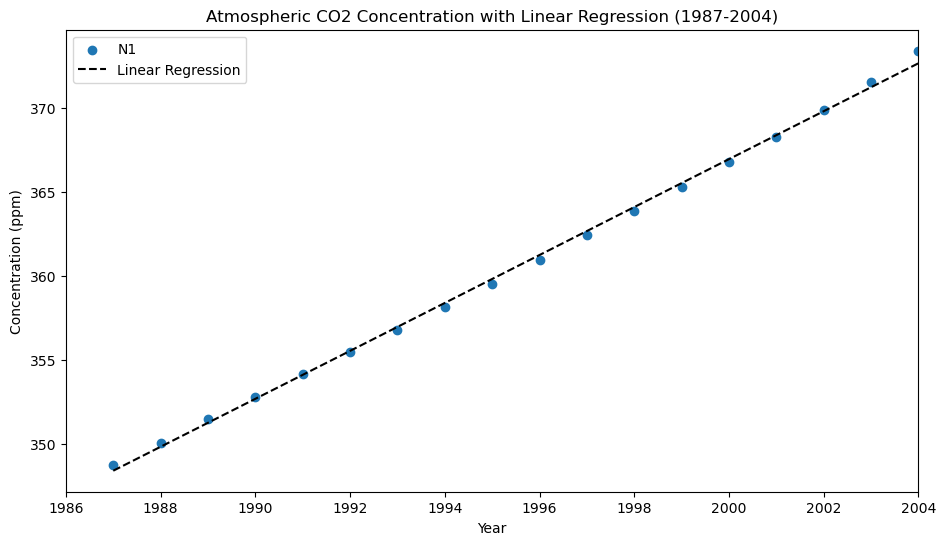

In [22]:
#5.1
da=pd.read_csv("C:\\ese5023\\global.1751_2014.csv")
da_convert=da.iloc[:, :2]
da_convert_drop=da_convert.drop(0)
da_convert_drop['PGC'] = da_convert_drop['Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C)'].astype(float).apply(lambda x: x * 1e12 / 1e15)
ppm = da_convert_drop[['Year', 'PGC']].loc[237:254]
a = []
N1 = 740 
N2 = 900  
k12 = 105 / 740  
k21 = 102 / 900  
num_years = len(ppm)
for i in range(num_years):
    year = ppm['Year'].iloc[i]
    gamma = ppm['PGC'].iloc[i]
    dN1_dt = -k12 * N1 + k21 * N2 + gamma
    dN2_dt = k12 * N1 - k21 * N2
    dt = 1  
    N1 += dN1_dt * dt
    N2 += dN2_dt * dt
    a.append(N1 / 2.13)
    print(f"年份: {year}, 大气中二氧化碳水平: {N1 / 2.13:.2f} ppm")
years = np.arange(1987, 2005, 1)
co2 = np.array(a).reshape(-1, 1)
X = years.reshape(-1, 1)  
Y = co2
regressor = LinearRegression()
regressor.fit(X, y)
predicted_co2 = regressor.predict(X)
plt.figure(figsize=(11, 6))
plt.scatter(X, Y, label='N1')
plt.plot(X, predicted_co2, color='black', linestyle='--', label='Linear Regression')
plt.xlabel('Year')
plt.ylabel('Concentration (ppm)')
plt.xlim(1986, 2004)
plt.title('Atmospheric CO2 Concentration with Linear Regression (1987-2004)')
plt.legend()
plt.show()


年份: 1987, 大气中二氧化碳水平: 386.25 ppm
年份: 1988, 大气中二氧化碳水平: 379.05 ppm
年份: 1989, 大气中二氧化碳水平: 384.78 ppm
年份: 1990, 大气中二氧化碳水平: 386.37 ppm
年份: 1991, 大气中二氧化碳水平: 389.31 ppm
年份: 1992, 大气中二氧化碳水平: 391.79 ppm
年份: 1993, 大气中二氧化碳水平: 394.41 ppm
年份: 1994, 大气中二氧化碳水平: 397.03 ppm
年份: 1995, 大气中二氧化碳水平: 399.73 ppm
年份: 1996, 大气中二氧化碳水平: 402.49 ppm
年份: 1997, 大气中二氧化碳水平: 405.30 ppm
年份: 1998, 大气中二氧化碳水平: 408.11 ppm
年份: 1999, 大气中二氧化碳水平: 410.92 ppm
年份: 2000, 大气中二氧化碳水平: 413.81 ppm
年份: 2001, 大气中二氧化碳水平: 416.77 ppm
年份: 2002, 大气中二氧化碳水平: 419.77 ppm
年份: 2003, 大气中二氧化碳水平: 422.95 ppm
年份: 2004, 大气中二氧化碳水平: 426.29 ppm


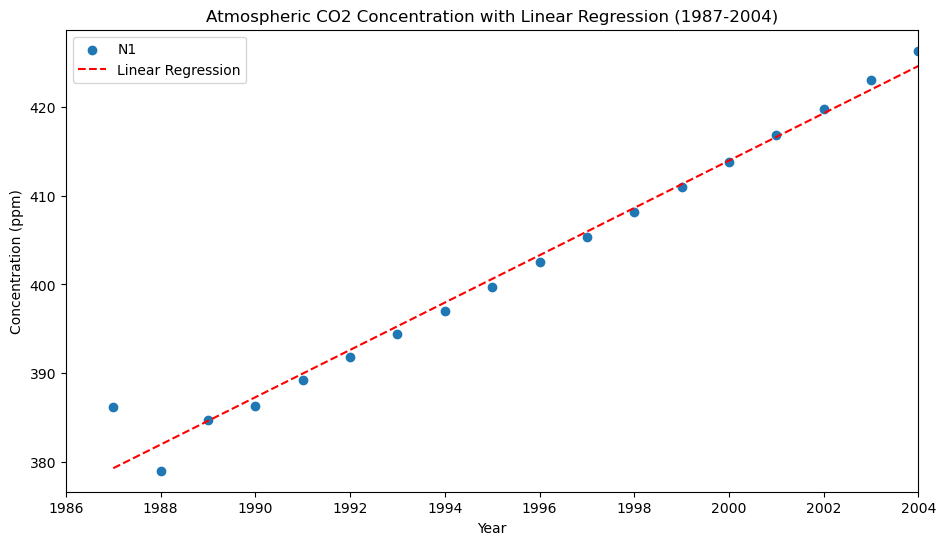

In [23]:
#5.2
b = []
N1 = 740  
N2 = 900  
k12 = 105 / 740  
k21 = 102 / 900  
N20 = 821  
for i in range(num_years):
    year = ppm['Year'].iloc[i]
    gamma1 = ppm['PGC'].iloc[i]
    z = N1 / 2.13 
    xi = 3.69 + 1.86 * 10**(-2) * z - 1.80 * 10**(-6) * z**2
    dN1_dt = -k12 * N1 + k21 * (N20 + xi * (N2 - N20)) + gamma1
    dN2_dt = k12 * N1 - k21 * (N20 + xi * (N2 - N20))
    dt = 1  
    N1 += dN1_dt * dt
    N2 += dN2_dt * dt
    b.append(N1 / 2.13)
    print(f"年份: {year}, 大气中二氧化碳水平: {N1 / 2.13:.2f} ppm")
years = np.arange(1987, 2005, 1)
co2_2 = np.array(b).reshape(-1, 1)
X_2 = years.reshape(-1, 1)  
Y_2 = co2_2
regressor = LinearRegression()
regressor.fit(X_2, y_2)
predicted_co2_2 = regressor.predict(X_2)
plt.figure(figsize=(11, 6))
plt.scatter(X_2, Y_2, label='N1')
plt.plot(X_2, predicted_co2_2, color='red', linestyle='--', label='Linear Regression')
plt.xlabel('Year')
plt.ylabel('Concentration (ppm)')
plt.xlim(1986, 2004)
plt.title('Atmospheric CO2 Concentration with Linear Regression (1987-2004)')
plt.legend()
plt.show()

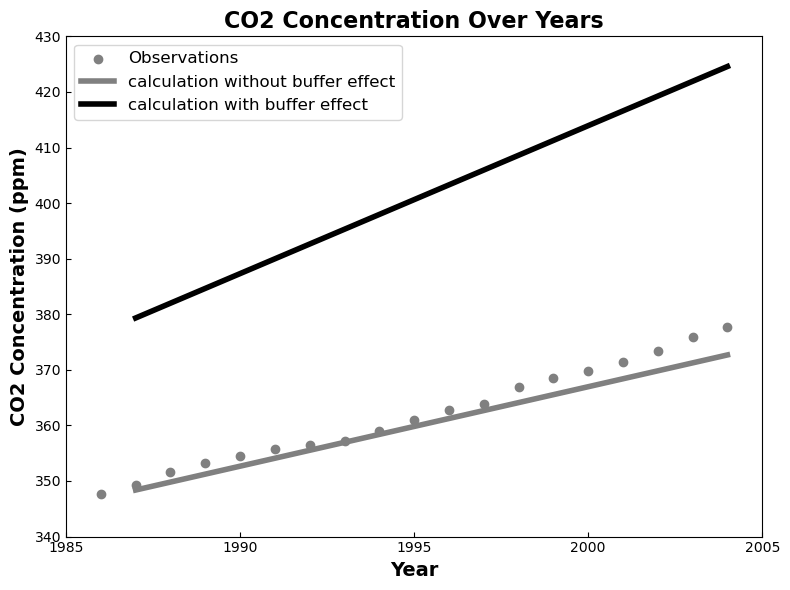

In [16]:
#5.3
da1 = pd.read_csv("C:\\ese5023\\co2_annmean_mlo.csv", comment='#')
filtered_da1 = da1[(da1['year'] >= 1986) & (da1['year'] <= 2004)]
years_with_1986 = filtered_da1['year']
observations_with_1986 = filtered_da1['mean']
plt.figure(figsize=(8, 6))
plt.scatter(years_with_1986, observations_with_1986, color='grey', label='Observations')
plt.plot(X, predicted_co2, color='grey', linestyle='-', label='calculation without buffer effect', linewidth=4)
plt.plot(X_2, predicted_co2_2, color='black', linestyle='-', label='calculation with buffer effect', linewidth=4)
plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in', which='both')
plt.xlabel('Year', fontsize=14, fontweight='bold')
plt.ylabel('CO2 Concentration (ppm)', fontsize=14, fontweight='bold')
plt.title('CO2 Concentration Over Years', fontsize=16, fontweight='bold')
plt.grid(False)
plt.xticks(np.arange(1985, 2006, 5))
plt.xlim(1985, 2005)
plt.ylim(340, 430)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

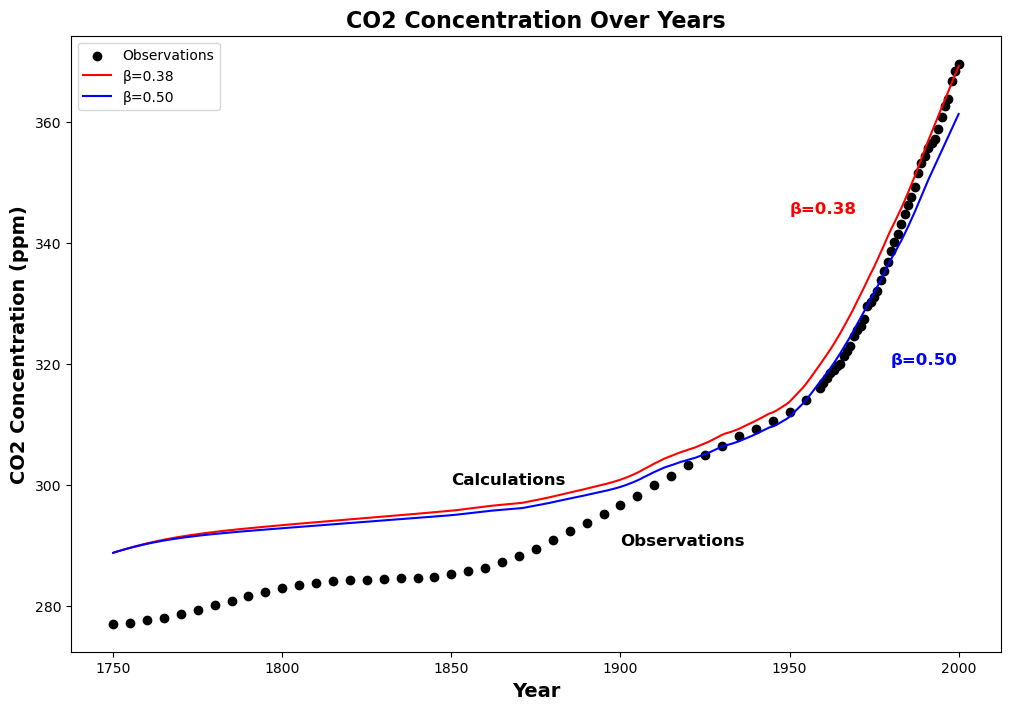

In [21]:
#5.4
co2_observations = pd.read_csv("C:\\ese5023\\1750-2000CO2.csv")
land_use_data = pd.read_excel("C:\\ese5023\\Global_land-use_flux-1750_2005.xls")
fossil_emissions = pd.read_csv("C:\\ese5023\\global_1751_2016.csv")
land_use_data = land_use_data[['Year', 'Global']]
land_use_data['LandUseChange'] = land_use_data['Global'] / (1000 * 2.13)
fossil_emissions = fossil_emissions[['Year', 'Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C)', 'Carbon emissions from cement production']]
fossil_emissions['FossilFuelEmissions'] = fossil_emissions.iloc[:, 1] - fossil_emissions.iloc[:, 2]
fossil_emissions['EmissionFactor'] = fossil_emissions['FossilFuelEmissions'] / (1000 * 2.13)
k12, k21, k23, k24, k32, k34, k43, k45, k51, k67, k71 = [60 / 615, 60 / 842, 9 / 842, 43 / 842, 52 / 9744, 162 / 9744, 205 / 26280, 0.2 / 26280, 0.2 / 90000000, 62 / 731, 62 / 1238]
initial_conditions = [615 / 2.13, 842 / 2.13, 9744 / 2.13, 26280 / 2.13, 90000000 / 2.13, 731 / 2.13, 1238 / 2.13]
N2_0 = 842 / 2.13
f0 = 62 / 2.13
P0 = 615 / 2.13
beta_values = [0.38, 0.5]
results = []
for beta in beta_values:
    N1, N2, N3, N4, N5, N6, N7 = initial_conditions.copy()
    atmosphere = [N1]
    for year in range(1751, 2001):
        gamma1 = fossil_emissions[fossil_emissions['Year'] == year]['EmissionFactor'].values[0]
        delta = land_use_data[land_use_data['Year'] == year]['LandUseChange'].values[0]
        xi = 3.69 + 0.0186 * N1 - 0.0000018 * N1**2
        f = f0 * (1 + beta * np.log(N1 / P0))
        dN1_dt = -k12 * N1 + k21 * (N2_0 + xi * (N2 - N2_0)) + gamma1 - f + delta + k51 * N5 + k71 * N7
        dN2_dt = k12 * N1 - k21 * (N2_0 + xi * (N2 - N2_0)) - k23 * N2 + k32 * N3 - k24 * N2
        dN3_dt = k23 * N2 - k32 * N3 - k34 * N3 + k43 * N4
        dN4_dt = k34 * N3 - k43 * N4 + k24 * N2 - k45 * N4
        dN5_dt = k45 * N4 - k51 * N5
        dN6_dt = f - k67 * N6 - 2 * delta
        dN7_dt = k67 * N6 - k71 * N7 + delta
        N1 += dN1_dt
        N2 += dN2_dt
        N3 += dN3_dt
        N4 += dN4_dt
        N5 += dN5_dt
        N6 += dN6_dt
        N7 += dN7_dt
        atmosphere.append(N1)
    results.append(atmosphere)
plt.figure(figsize=(12, 8))
plt.scatter(co2_observations['year'], co2_observations['mean'], label='Observations', color='black')
plt.text(1850, 300, 'Calculations', fontsize=12, fontweight='bold')
plt.text(1900, 290, 'Observations', fontsize=12, fontweight='bold')
plt.text(1950, 345, 'β=0.38', fontsize=12, fontweight='bold', color='red')
plt.text(1980, 320, 'β=0.50', fontsize=12, fontweight='bold', color='blue')
plt.plot(range(1750, 2001), results[0], color='red', label='β=0.38')
plt.plot(range(1750, 2001), results[1], color='blue', label='β=0.50')
plt.xlabel('Year', fontsize=14, fontweight='bold')
plt.ylabel('CO2 Concentration (ppm)', fontsize=14, fontweight='bold')
plt.title('CO2 Concentration Over Years', fontsize=16, fontweight='bold')
plt.legend()
plt.show()